In [20]:
import requests
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=Replace_Api_Key'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-12-31 18:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-12-31 18:55:00': {'1. open': '219.6600', '2. high': '219.6600', '3. low': '219.6600', '4. close': '219.6600', '5. volume': '6'}, '2024-12-31 18:50:00': {'1. open': '219.6600', '2. high': '219.6600', '3. low': '219.6200', '4. close': '219.6600', '5. volume': '78'}, '2024-12-31 18:45:00': {'1. open': '219.6200', '2. high': '219.6200', '3. low': '219.6200', '4. close': '219.6200', '5. volume': '14'}, '2024-12-31 18:40:00': {'1. open': '220.3000', '2. high': '220.3000', '3. low': '219.6200', '4. close': '219.6200', '5. volume': '35'}, '2024-12-31 18:35:00': {'1. open': '220.0000', '2. high': '220.3000', '3. low': '220.0000', '4. close': '220.0000', '5. volume': '15'}, '2024-12-31 18:30:00': {'1. open': '219.8300', '2. high': 

In [21]:
import pandas as pd

# Extract the 'Time Series' data
time_series = data.get('Time Series (5min)', {})

# Convert the 'Time Series' data into a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')

# Rename columns to remove the numerical prefix and leading space
df.columns = [col.split('. ')[1] for col in df.columns]

# Display the DataFrame
print(df)


                         open      high       low     close volume
2024-12-31 18:55:00  219.6600  219.6600  219.6600  219.6600      6
2024-12-31 18:50:00  219.6600  219.6600  219.6200  219.6600     78
2024-12-31 18:45:00  219.6200  219.6200  219.6200  219.6200     14
2024-12-31 18:40:00  220.3000  220.3000  219.6200  219.6200     35
2024-12-31 18:35:00  220.0000  220.3000  220.0000  220.0000     15
...                       ...       ...       ...       ...    ...
2024-12-31 10:15:00  219.2850  219.7000  219.1900  219.7000  16807
2024-12-31 10:10:00  219.0900  219.3599  219.0300  219.2400  14956
2024-12-31 10:05:00  219.6400  219.7900  218.9500  219.0050  34193
2024-12-31 10:00:00  220.0615  220.2450  219.6148  219.6750  16086
2024-12-31 09:55:00  219.8368  220.1900  219.7500  220.0605  14113

[100 rows x 5 columns]


In [22]:
df.head()

,open,high,low,close,volume
2024-12-31 18:55:00,219.6600,219.6600,219.6600,219.6600,6
2024-12-31 18:50:00,219.6600,219.6600,219.6200,219.6600,78
2024-12-31 18:45:00,219.6200,219.6200,219.6200,219.6200,14
2024-12-31 18:40:00,220.3000,220.3000,219.6200,219.6200,35
2024-12-31 18:35:00,220.0000,220.3000,220.0000,220.0000,15


In [23]:
df.tail()

,open,high,low,close,volume
2024-12-31 10:15:00,219.2850,219.7000,219.1900,219.7000,16807
2024-12-31 10:10:00,219.0900,219.3599,219.0300,219.2400,14956
2024-12-31 10:05:00,219.6400,219.7900,218.9500,219.0050,34193
2024-12-31 10:00:00,220.0615,220.2450,219.6148,219.6750,16086
2024-12-31 09:55:00,219.8368,220.1900,219.7500,220.0605,14113


<p style="color:MediumVioletRed;font-size:20px;">Checking Data Types</p>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2024-12-31 18:55:00 to 2024-12-31 09:55:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    100 non-null    object
 1   high    100 non-null    object
 2   low     100 non-null    object
 3   close   100 non-null    object
 4   volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


<p style="color:MediumVioletRed;font-size:20px;">Checking Statistics in the data set</p>

In [25]:
df.describe().T

,count,unique,top,freq
open,100,71,220.0000,7
high,100,76,220.0000,8
low,100,74,219.6200,5
close,100,77,219.6600,4
volume,100,96,6,3


In [26]:
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

In [27]:
import requests
import pandas as pd
# Extract the 'Time Series' data
time_series = data.get('Time Series (5min)', {})

# Convert the 'Time Series' data into a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')

# Rename columns to remove the numerical prefix and leading space
df.columns = [col.split('. ')[1] for col in df.columns]

# Convert index to datetime and set as index
df.index = pd.to_datetime(df.index)
df.index.name = "date"

# Display the DataFrame
df

,open,high,low,close,volume
date,,,,,
2024-12-31 18:55:00,219.6600,219.6600,219.6600,219.6600,6
2024-12-31 18:50:00,219.6600,219.6600,219.6200,219.6600,78
2024-12-31 18:45:00,219.6200,219.6200,219.6200,219.6200,14
2024-12-31 18:40:00,220.3000,220.3000,219.6200,219.6200,35
2024-12-31 18:35:00,220.0000,220.3000,220.0000,220.0000,15
...,...,...,...,...,...
2024-12-31 10:15:00,219.2850,219.7000,219.1900,219.7000,16807
2024-12-31 10:10:00,219.0900,219.3599,219.0300,219.2400,14956
2024-12-31 10:05:00,219.6400,219.7900,218.9500,219.0050,34193


In [28]:
df.index = pd.to_datetime(df.index)
df.head()

,open,high,low,close,volume
date,,,,,
2024-12-31 18:55:00,219.6600,219.6600,219.6600,219.6600,6
2024-12-31 18:50:00,219.6600,219.6600,219.6200,219.6600,78
2024-12-31 18:45:00,219.6200,219.6200,219.6200,219.6200,14
2024-12-31 18:40:00,220.3000,220.3000,219.6200,219.6200,35
2024-12-31 18:35:00,220.0000,220.3000,220.0000,220.0000,15


<p style="color:MediumVioletRed;font-size:20px;">Checking unique Values</p>

In [29]:
import numpy as np
import pandas as pd

unique_values = np.unique(df[['volume', 'open', 'high', 'low', 'close']].values.flatten())

# Display the unique values
print(unique_values)


['1' '10040' '10058' '10066' '10104' '10415' '10453' '10488' '10899'
 '10990' '11000' '11059' '1107' '11234' '11310' '11484' '11502' '11519'
 '11525' '11806' '12' '12013' '12142' '12156' '1217665' '12283' '12375'
 '12523' '12572' '12606' '13088' '13399' '13436' '13721' '14' '14113'
 '14194' '14683' '14956' '14986' '15' '15384' '16' '16086' '16098' '16807'
 '16868' '17034' '17065' '18' '18279' '19325' '19436' '20010' '20037'
 '20041' '200695' '20123' '20209' '20661' '218.0000' '218.4400' '218.5200'
 '218.5250' '218.5278' '218.5350' '218.5400' '218.5700' '218.5900'
 '218.6000' '218.6100' '218.6200' '218.6400' '218.6450' '218.6500'
 '218.6600' '218.6700' '218.6800' '218.6900' '218.6935' '218.7000'
 '218.7100' '218.7101' '218.7200' '218.7400' '218.7450' '218.7500'
 '218.7550' '218.7600' '218.7700' '218.7800' '218.7900' '218.8000'
 '218.8100' '218.8300' '218.8486' '218.8550' '218.8600' '218.8700'
 '218.8750' '218.9000' '218.9200' '218.9250' '218.9300' '218.9500'
 '218.9600' '218.9700' '218.

<p style="color:MediumVioletRed;font-size:20px;">Checking Missing values</p>

In [30]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [31]:
df.dropna()

,open,high,low,close,volume
date,,,,,
2024-12-31 18:55:00,219.6600,219.6600,219.6600,219.6600,6
2024-12-31 18:50:00,219.6600,219.6600,219.6200,219.6600,78
2024-12-31 18:45:00,219.6200,219.6200,219.6200,219.6200,14
2024-12-31 18:40:00,220.3000,220.3000,219.6200,219.6200,35
2024-12-31 18:35:00,220.0000,220.3000,220.0000,220.0000,15
...,...,...,...,...,...
2024-12-31 10:15:00,219.2850,219.7000,219.1900,219.7000,16807
2024-12-31 10:10:00,219.0900,219.3599,219.0300,219.2400,14956
2024-12-31 10:05:00,219.6400,219.7900,218.9500,219.0050,34193


In [32]:
df.fillna(df['volume'])

,open,high,low,close,volume
date,,,,,
2024-12-31 18:55:00,219.6600,219.6600,219.6600,219.6600,6
2024-12-31 18:50:00,219.6600,219.6600,219.6200,219.6600,78
2024-12-31 18:45:00,219.6200,219.6200,219.6200,219.6200,14
2024-12-31 18:40:00,220.3000,220.3000,219.6200,219.6200,35
2024-12-31 18:35:00,220.0000,220.3000,220.0000,220.0000,15
...,...,...,...,...,...
2024-12-31 10:15:00,219.2850,219.7000,219.1900,219.7000,16807
2024-12-31 10:10:00,219.0900,219.3599,219.0300,219.2400,14956
2024-12-31 10:05:00,219.6400,219.7900,218.9500,219.0050,34193


In [33]:
import pandas as pd

# Provided DataFrame data
data = {
    "open": [222.7450, 222.9000, 222.8000, 222.9900, 222.9000, 222.0150, 221.7300, 221.8300, 221.5370, 221.7850],
    "high": [222.7800, 222.9000, 222.8000, 222.9900, 222.9000, 222.1100, 222.1600, 221.8400, 221.9900, 221.9200],
    "low": [222.5000, 222.9000, 222.6000, 222.9900, 222.9000, 221.8800, 221.6600, 221.4300, 221.5150, 221.4700],
    "close": [222.5122, 222.9000, 222.6000, 222.9900, 222.9000, 222.1100, 222.1585, 221.6900, 221.7700, 221.5900],
    "volume": [76, 3, 61, 2, 7, 13593, 15319, 18674, 35997, 15752]
}

index = [
    "2024-12-27 19:50:00",
    "2024-12-27 19:45:00",
    "2024-12-27 19:35:00",
    "2024-12-27 19:30:00",
    "2024-12-27 19:20:00",
    "2024-12-27 10:55:00",
    "2024-12-27 10:50:00",
    "2024-12-27 10:45:00",
    "2024-12-27 10:40:00",
    "2024-12-27 10:35:00"
]

# Create DataFrame
df = pd.DataFrame(data, index=pd.to_datetime(index))

# Set the index to the date column
df.index.name = "date"


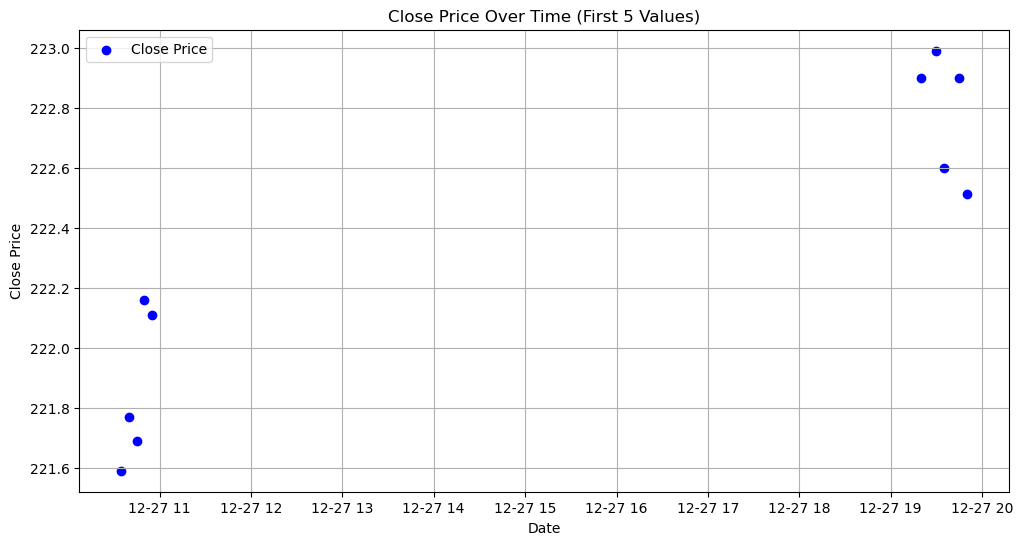

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plotting the 'Close' price for the first 5 values
plt.scatter(df.index[:20], df['close'][:20], label='Close Price', color='blue')

# Adding labels and title
plt.title('Close Price Over Time (First 5 Values)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

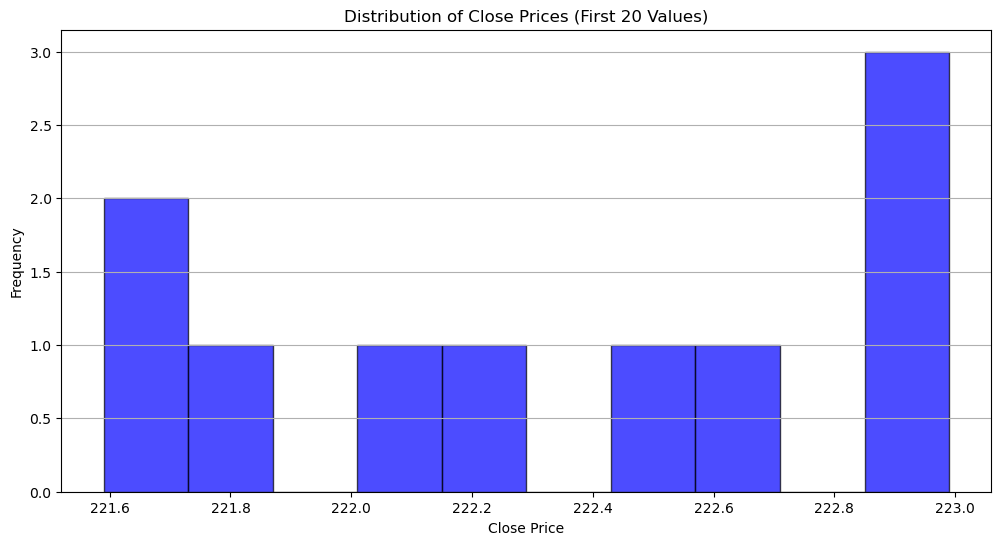

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting the histogram for the 'Close' prices of the first 20 values
plt.hist(df['close'][:20], bins=10, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Close Prices (First 20 Values)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


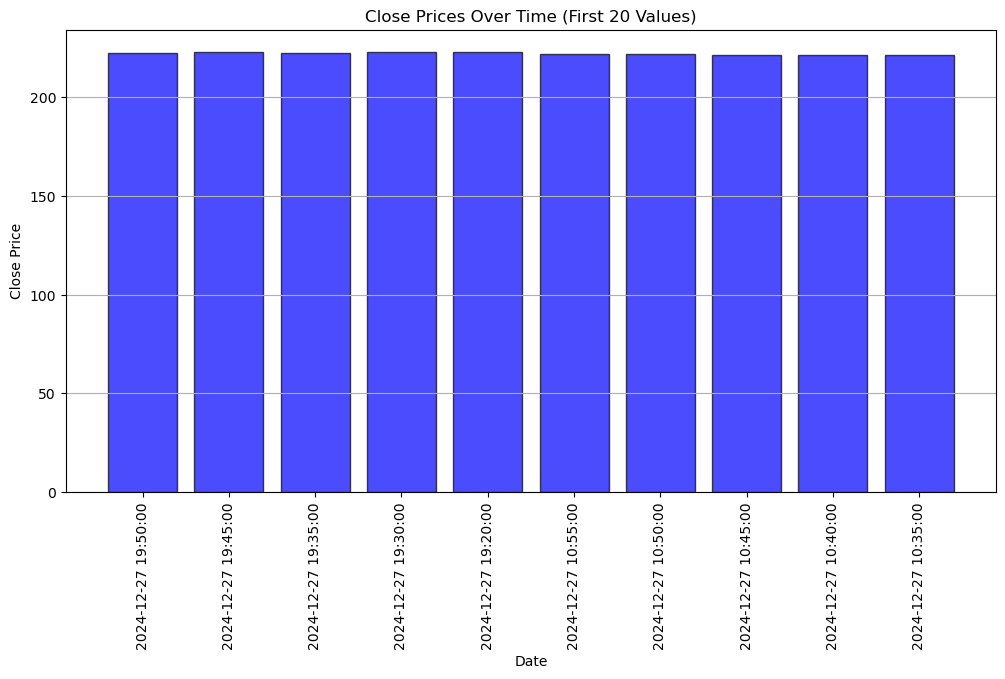

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting the bar chart for the 'Close' prices of the first 20 values
plt.bar(df.index[:20].strftime('%Y-%m-%d %H:%M:%S'), df['close'][:20], color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Close Prices Over Time (First 20 Values)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


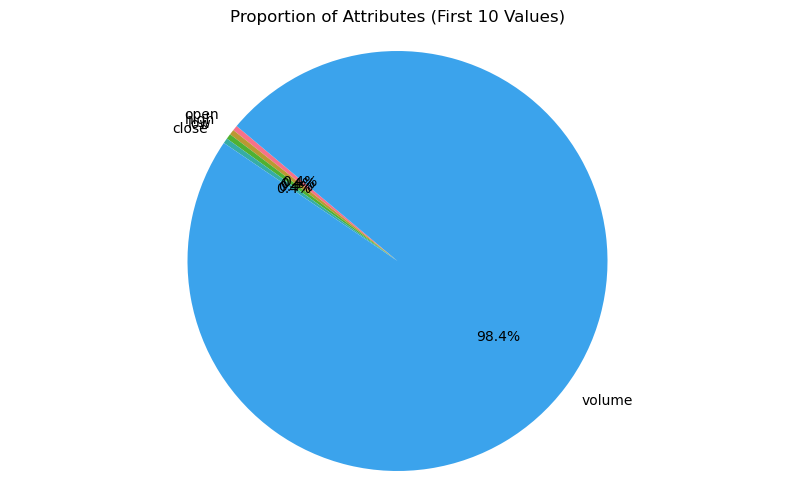

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch JSON data from URL
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=NKPKLMT7ISS5VWKE'
r = requests.get(url)
data = r.json()

# Extract the 'Time Series' data
time_series = data.get('Time Series (5min)', {})

# Convert the 'Time Series' data into a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')

# Rename columns to remove the numerical prefix and leading space
df.columns = [col.split('. ')[1] for col in df.columns]

# Convert index to datetime
df.index = pd.to_datetime(df.index)
df.index.name = "date"

# Select the first 10 rows
df_top_10 = df[:10].astype(float)

# Sum values of each attribute
sums = df_top_10.sum()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Attributes (First 10 Values)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


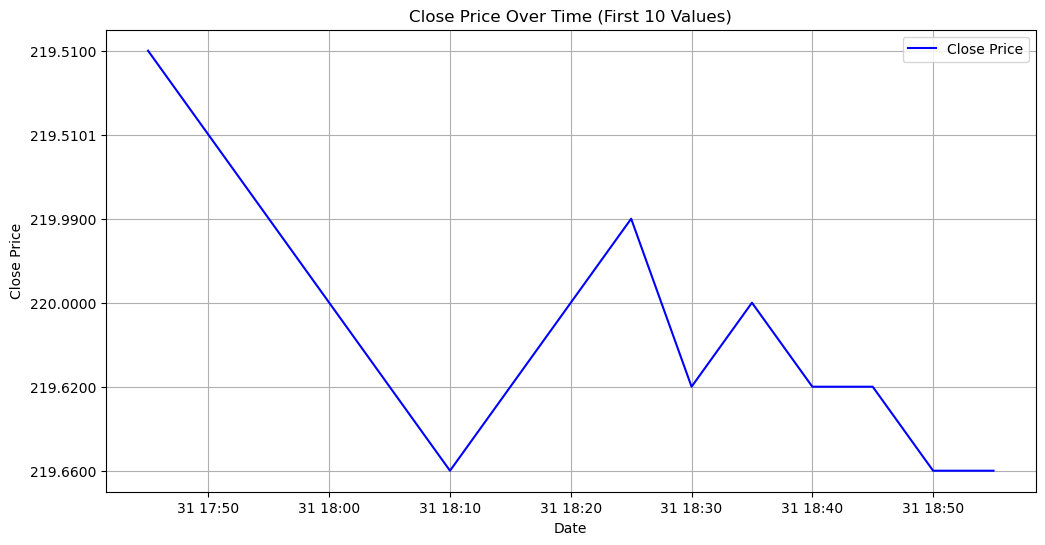

In [38]:


plt.figure(figsize=(12, 6))

# Line plot for 'Close' prices (first 10 values)
plt.plot(df.index[:10], df['close'][:10], label='Close Price', color='blue')

# Adding labels and title
plt.title('Close Price Over Time (First 10 Values)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


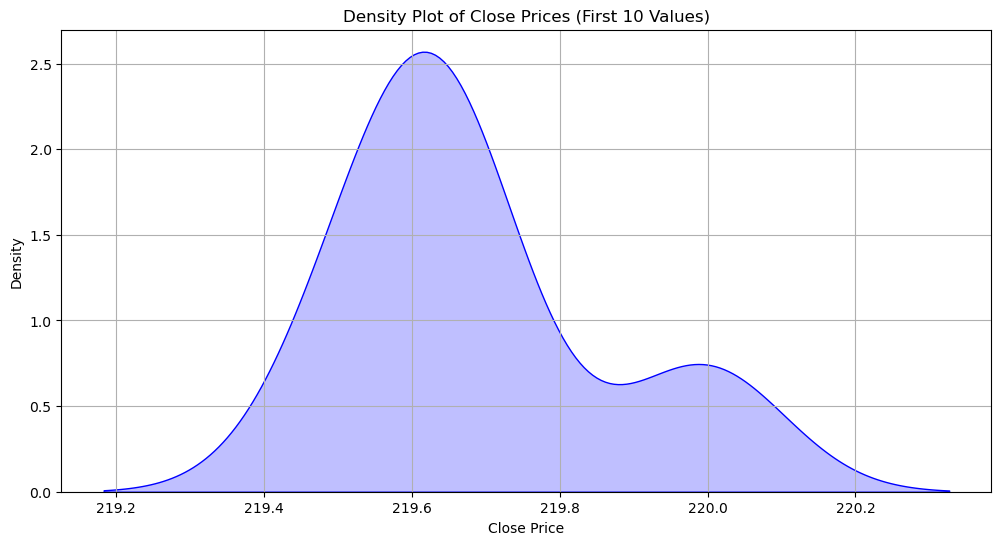

In [39]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Density plot for 'Close' prices (first 10 values)
sns.kdeplot(df['close'][:10].astype(float), fill=True, color='blue')

# Adding labels and title
plt.title('Density Plot of Close Prices (First 10 Values)')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.grid()
plt.show()



C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


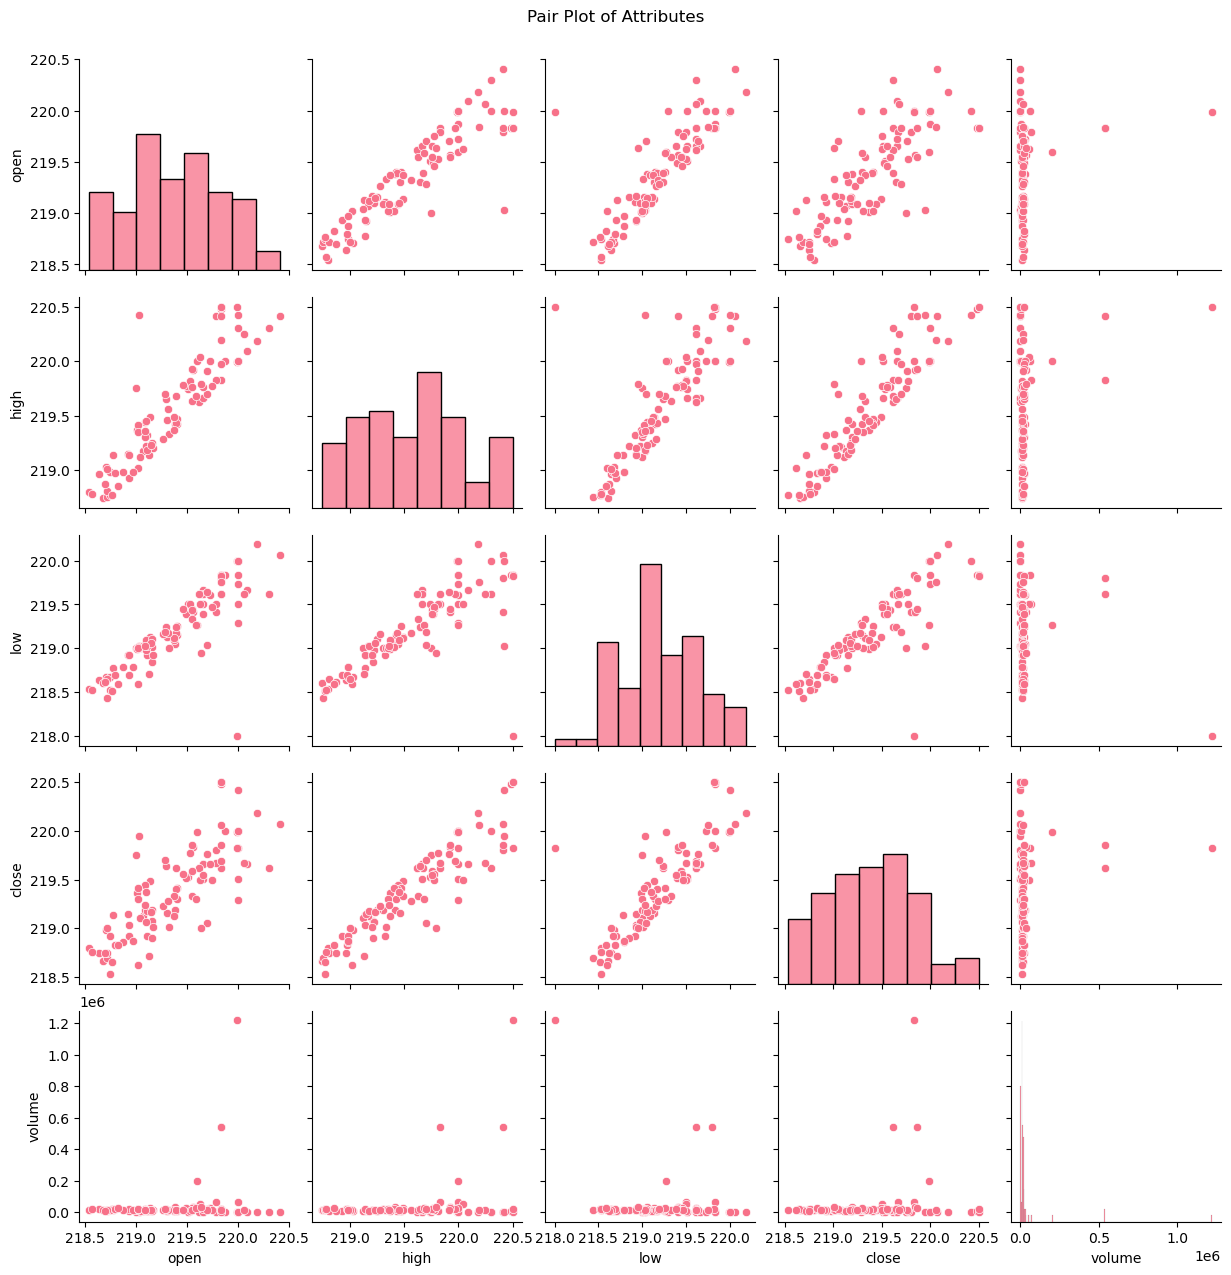

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv("your_dataset.csv")  # Uncomment this line if you are loading from a CSV file

# Ensure all columns are numeric for pair plot
df = df.astype(float)

# Set a color palette globally
sns.set_palette("husl")  # Example palette, you can change to any other palette like "coolwarm", "viridis", etc.

# Create pair plot
sns.pairplot(df)

# Adding labels and title
plt.suptitle('Pair Plot of Attributes', y=1.02)  # Adjust the title position
plt.show()
